**PEMAHAMAN FITUR**

ID: Identifikasi unik untuk setiap catatan insiden.

Case Number: Nomor kasus yang diberikan oleh Departemen Kepolisian Chicago, unik untuk setiap insiden.

Date: Tanggal dan waktu terjadinya insiden.

Block: Alamat blok tempat insiden terjadi (alamat spesifik disamarkan untuk melindungi privasi).

IUCR: Kode pelaporan kejahatan menurut Illinois Uniform Crime Reporting.

Primary Type: Kategori utama kejahatan (misalnya, THEFT, BATTERY).

Description: Deskripsi lebih rinci tentang jenis kejahatan.

Location Description: Jenis lokasi tempat kejahatan terjadi (misalnya, STREET, RESIDENCE).

Arrest: Menunjukkan apakah ada penangkapan yang dilakukan (TRUE/FALSE).

Domestic: Menunjukkan apakah insiden terkait dengan kekerasan domestik (TRUE/FALSE).

Beat: Kode area patroli polisi tempat insiden terjadi.

District: Kode distrik polisi tempat insiden terjadi.

Ward: Kode distrik pemilihan kota tempat insiden terjadi.

Community Area: Kode area komunitas di Chicago tempat insiden terjadi.

FBI Code: Kode klasifikasi kejahatan menurut FBI.

X Coordinate dan Y Coordinate: Koordinat peta dalam sistem koordinat negara bagian Illinois.

Year: Tahun terjadinya insiden.

Updated On: Tanggal terakhir data diperbarui.

Latitude dan Longitude: Koordinat geografis tempat insiden terjadi.

Location: Gabungan dari Latitude dan Longitude dalam format titik lokasi.

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("data kriminal chicago 2025.csv")
df.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,13815077,JJ228927,2025-04-23 00:00:00,003XX E 84TH ST,0460,BATTERY,SIMPLE,SCHOOL - PUBLIC GROUNDS,False,False,...,6,44,08B,1179729.0,1849371.0,2025,2025-04-30T15:40:44.000,41.741949,-87.617054,"\n, \n(41.741949408, -87.617054222)"
1,13815089,JJ229130,2025-04-23 00:00:00,001XX E SUPERIOR ST,0261,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,HOTEL / MOTEL,False,False,...,2,8,02,1177508.0,1905401.0,2025,2025-04-30T15:40:44.000,41.895751,-87.623496,"\n, \n(41.895750913, -87.623495923)"
2,13814553,JJ228348,2025-04-23 00:00:00,0000X W CHESTNUT ST,0583,STALKING,CYBERSTALKING,APARTMENT,False,True,...,42,8,08A,1175936.0,1906207.0,2025,2025-04-30T15:40:44.000,41.897998,-87.629245,"\n, \n(41.897998161, -87.629245169)"
3,13820835,JJ236276,2025-04-23 00:00:00,001XX N LECLAIRE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,APARTMENT,False,False,...,28,25,11,NaN,NaN,2025,2025-04-30T15:40:44.000,NaN,NaN,NaN
4,13818089,JJ233007,2025-04-23 00:00:00,087XX S EXCHANGE AVE,0930,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,STREET,False,False,...,10,46,07,1197281.0,1847639.0,2025,2025-04-30T15:40:44.000,41.736778,-87.552803,"\n, \n(41.736777767, -87.552802808)"


# **Pre-Processing dan EDA**

In [3]:
df.duplicated().sum()

np.int64(0)

Karena tujuannya adalah ARM analisis pola kriminal dengan Algoritma Apriori dan FP-Growth berdasarkan spasio dan temporalnya, maka tidak semua fitur digunakan. Hanya fitur-fitur yang relevan dengan spasial, temporal, dan kriminal.

In [4]:
# kolom-kolom yang relevan
kolom_dipertahankan = [
    'date',
    'year',
    'primary_type',
    'community_area',
    'location_description',
    'arrest'
]

# hapus kolom lain
df = df[kolom_dipertahankan]

In [5]:
df.head()

,date,year,primary_type,community_area,location_description,arrest
0,2025-04-23 00:00:00,2025,BATTERY,44,SCHOOL - PUBLIC GROUNDS,False
1,2025-04-23 00:00:00,2025,CRIMINAL SEXUAL ASSAULT,8,HOTEL / MOTEL,False
2,2025-04-23 00:00:00,2025,STALKING,8,APARTMENT,False
3,2025-04-23 00:00:00,2025,DECEPTIVE PRACTICE,25,APARTMENT,False
4,2025-04-23 00:00:00,2025,MOTOR VEHICLE THEFT,46,STREET,False


**memecah kolom date menjadi bulan, hari, dan jam**

In [6]:
# memastikan kolom 'date' tipenya datetime
df['date'] = pd.to_datetime(df['date'])

# Tambahkan kolom waktu turunan
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()

In [7]:
df

,date,year,primary_type,community_area,location_description,arrest,hour,day,month
0,2025-04-23 00:00:00,2025,BATTERY,44,SCHOOL - PUBLIC GROUNDS,False,0,Wednesday,April
1,2025-04-23 00:00:00,2025,CRIMINAL SEXUAL ASSAULT,8,HOTEL / MOTEL,False,0,Wednesday,April
2,2025-04-23 00:00:00,2025,STALKING,8,APARTMENT,False,0,Wednesday,April
3,2025-04-23 00:00:00,2025,DECEPTIVE PRACTICE,25,APARTMENT,False,0,Wednesday,April
4,2025-04-23 00:00:00,2025,MOTOR VEHICLE THEFT,46,STREET,False,0,Wednesday,April
...,...,...,...,...,...,...,...,...,...
995,2025-04-21 12:20:00,2025,THEFT,25,RESIDENCE - YARD (FRONT / BACK),False,12,Monday,April
996,2025-04-21 12:15:00,2025,BATTERY,68,APARTMENT,False,12,Monday,April
997,2025-04-21 12:05:00,2025,OTHER OFFENSE,75,PARKING LOT / GARAGE (NON RESIDENTIAL),True,12,Monday,April
998,2025-04-21 12:02:00,2025,BATTERY,20,RESIDENCE,False,12,Monday,April


**Incomplete Data**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1000 non-null   datetime64[ns]
 1   year                  1000 non-null   int64         
 2   primary_type          1000 non-null   object        
 3   community_area        1000 non-null   int64         
 4   location_description  999 non-null    object        
 5   arrest                1000 non-null   bool          
 6   hour                  1000 non-null   int32         
 7   day                   1000 non-null   object        
 8   month                 1000 non-null   object        
dtypes: bool(1), datetime64[ns](1), int32(1), int64(2), object(4)
memory usage: 59.7+ KB


menjadikan semua fitur yang numerik menjadi kategorikal, karena ARM fokus pada kombinasi elemen unik, bukan nilai numerik atau urutan

In [9]:
# memastikan 'community area', 'year', dan 'hour' menjadi tipe object (string)
df['community_area'] = df['community_area'].astype(str)
df['year'] = df['year'].astype(str)
df['hour'] = df['hour'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1000 non-null   datetime64[ns]
 1   year                  1000 non-null   object        
 2   primary_type          1000 non-null   object        
 3   community_area        1000 non-null   object        
 4   location_description  999 non-null    object        
 5   arrest                1000 non-null   bool          
 6   hour                  1000 non-null   object        
 7   day                   1000 non-null   object        
 8   month                 1000 non-null   object        
dtypes: bool(1), datetime64[ns](1), object(7)
memory usage: 63.6+ KB


In [10]:
df

,date,year,primary_type,community_area,location_description,arrest,hour,day,month
0,2025-04-23 00:00:00,2025,BATTERY,44,SCHOOL - PUBLIC GROUNDS,False,0,Wednesday,April
1,2025-04-23 00:00:00,2025,CRIMINAL SEXUAL ASSAULT,8,HOTEL / MOTEL,False,0,Wednesday,April
2,2025-04-23 00:00:00,2025,STALKING,8,APARTMENT,False,0,Wednesday,April
3,2025-04-23 00:00:00,2025,DECEPTIVE PRACTICE,25,APARTMENT,False,0,Wednesday,April
4,2025-04-23 00:00:00,2025,MOTOR VEHICLE THEFT,46,STREET,False,0,Wednesday,April
...,...,...,...,...,...,...,...,...,...
995,2025-04-21 12:20:00,2025,THEFT,25,RESIDENCE - YARD (FRONT / BACK),False,12,Monday,April
996,2025-04-21 12:15:00,2025,BATTERY,68,APARTMENT,False,12,Monday,April
997,2025-04-21 12:05:00,2025,OTHER OFFENSE,75,PARKING LOT / GARAGE (NON RESIDENTIAL),True,12,Monday,April
998,2025-04-21 12:02:00,2025,BATTERY,20,RESIDENCE,False,12,Monday,April


**Handling Missing Value**

In [11]:
Before_MissingValue = df.isnull().sum()
print("Missing Values before handling:\n", Before_MissingValue)

Missing Values before handling:
 date                    0
year                    0
primary_type            0
community_area          0
location_description    1
arrest                  0
hour                    0
day                     0
month                   0
dtype: int64


In [12]:
df = df.apply(lambda x: x.fillna(x.mode()[0]))

In [13]:
Handling_MissingValue = df.isnull().sum()
print("Missing Values after handling:\n", Handling_MissingValue)

Missing Values after handling:
 date                    0
year                    0
primary_type            0
community_area          0
location_description    0
arrest                  0
hour                    0
day                     0
month                   0
dtype: int64


In [14]:
df.head()

,date,year,primary_type,community_area,location_description,arrest,hour,day,month
0,2025-04-23,2025,BATTERY,44,SCHOOL - PUBLIC GROUNDS,False,0,Wednesday,April
1,2025-04-23,2025,CRIMINAL SEXUAL ASSAULT,8,HOTEL / MOTEL,False,0,Wednesday,April
2,2025-04-23,2025,STALKING,8,APARTMENT,False,0,Wednesday,April
3,2025-04-23,2025,DECEPTIVE PRACTICE,25,APARTMENT,False,0,Wednesday,April
4,2025-04-23,2025,MOTOR VEHICLE THEFT,46,STREET,False,0,Wednesday,April


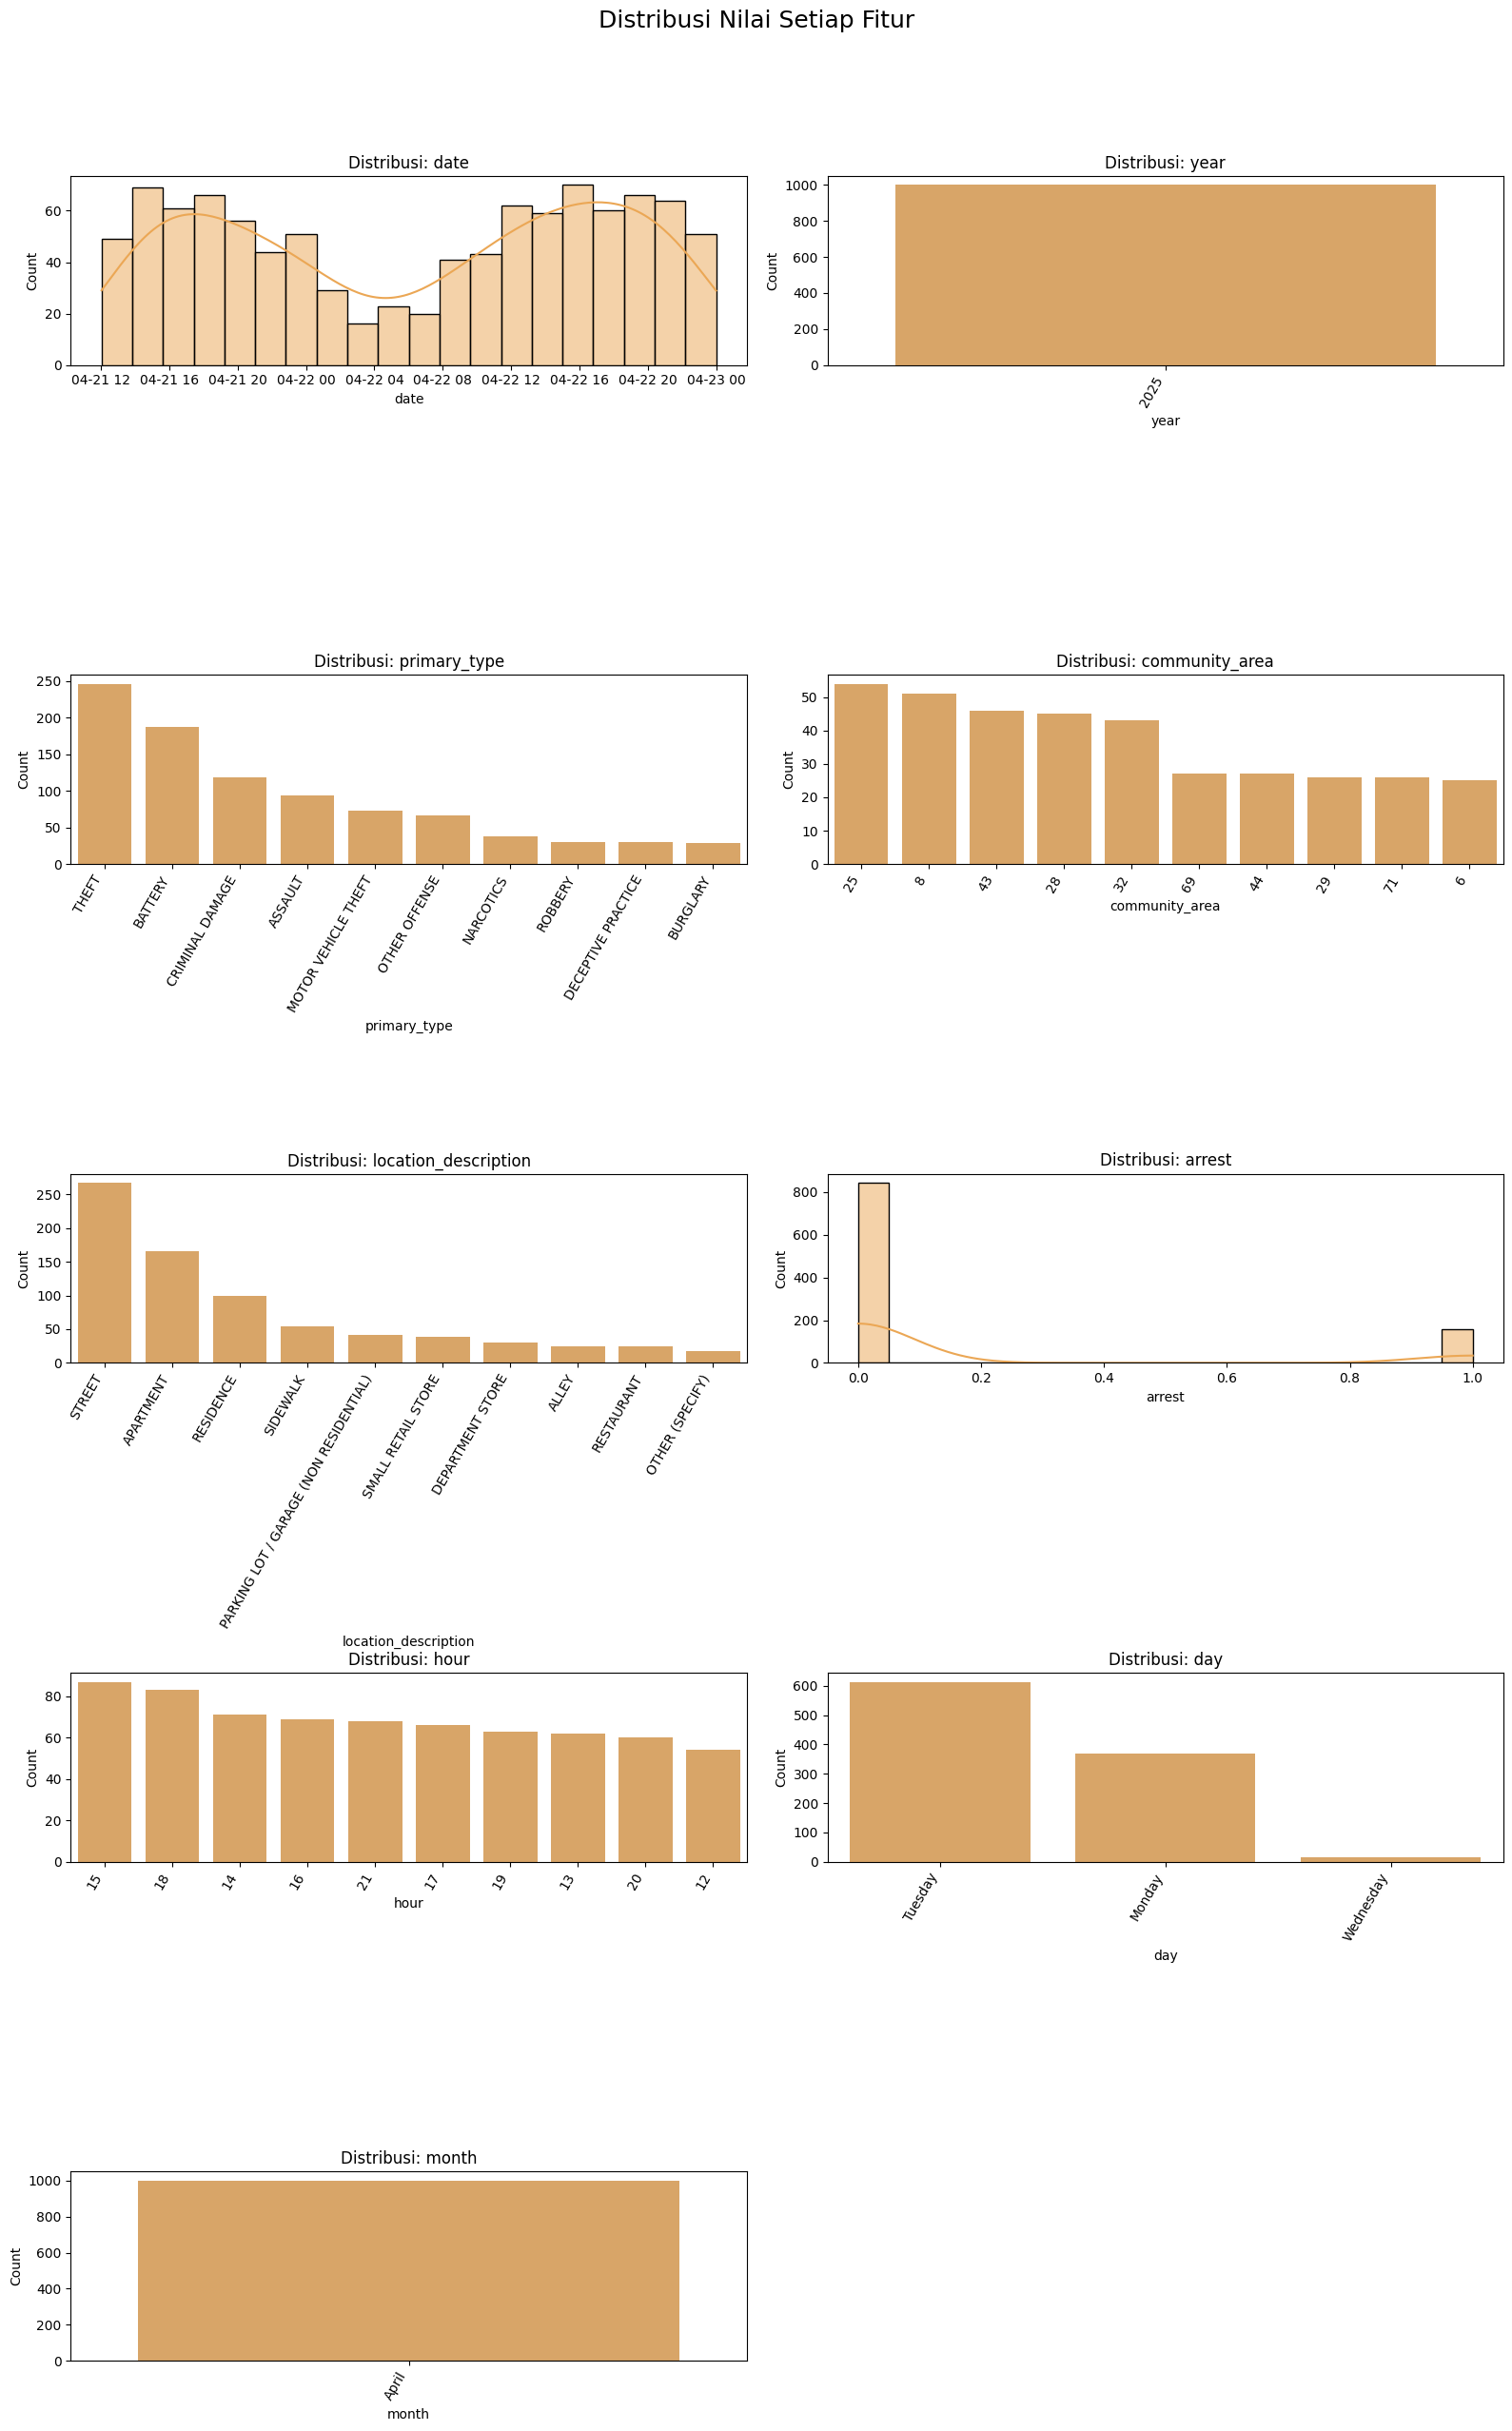

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = df.columns
n_cols = 2
n_rows = (len(cols) + 1) // n_cols

plt.figure(figsize=(16, n_rows * 5))

for idx, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, idx)

    if df[col].dtype == 'object':
        order = df[col].value_counts().index[:10]
        sns.countplot(data=df, x=col, order=order, color="#EBA755")
        plt.xticks(rotation=60, ha='right')
    else:
        sns.histplot(data=df, x=col, bins=20, kde=True, color="#EBA755")

    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.suptitle("Distribusi Nilai Setiap Fitur", fontsize=18, y=1.02)
plt.subplots_adjust(top=0.95)
plt.show()

**tidak perlu handling outliers karena data sudah kategorikal semua**

# **Penerapan Algoritma**

mengubah data kategorikal menjadi format transaksi menggunakan one hot encoding. Mengubah data menjadi format transaksi karena ARM tidak dapat memproses data tabular biasa

In [16]:
!pip install mlxtend

In [17]:
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [18]:
# mengasumsikan setiap baris adalah satu kejadian kriminal

# mengubah semua kolom ke string dan menggabungkan per-baris jadi item-item transaksi
transaksi = df.astype(str).values.tolist()

# encoding dengan one hot
te = TransactionEncoder()
transaksi_encoded = te.fit(transaksi).transform(transaksi)
df_transaksi = pd.DataFrame(transaksi_encoded, columns=te.columns_)

In [19]:
df_transaksi

,0,1,10,11,12,13,14,15,16,17,...,STALKING,STREET,THEFT,True,Tuesday,VACANT LOT,VACANT LOT / LAND,VEHICLE NON-COMMERCIAL,WEAPONS VIOLATION,Wednesday
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
996,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
998,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**ALGORITMA APRIORI**

memakai min_support 0.03. itu menganggap bahwa hanya item set yang muncul sebanyak >= 30. di bawah 30 ga diitung. karena kalau pakai 0.01 atau 0.02 itu aturannya terlalu umum (kurang spesifik) karena item setnya cuma muncul 10/20 kali aja. sedangkan kalau pakai yang terlalu banyak (lebih dari 0.03) takutnya menghapus atau mengabaikan pola yang cukup penting, bisa nyebabin underfitting juga

In [24]:
import time
import tracemalloc
from mlxtend.frequent_patterns import apriori

start_time = time.time()
tracemalloc.start()

frequent_itemsets_apriori = apriori(df_transaksi, min_support=0.03, use_colnames=True)

end_time = time.time()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

print(f"Runtime: {end_time - start_time:.4f} detik")
print(f"Memori saat ini: {current / 1024:.2f} KB")
print(f"Puncak penggunaan memori: {peak / 1024:.2f} KB")

Runtime: 0.1355 detik
Memori saat ini: 590.91 KB
Puncak penggunaan memori: 11199.23 KB


**ALGORITMA FP-GROWTH**

In [26]:
from mlxtend.frequent_patterns import fpgrowth
import time
import tracemalloc

start_time = time.time()
tracemalloc.start()

frequent_itemsets_fp = fpgrowth(df_transaksi,
                                 min_support=0.03,
                                 use_colnames=True)


end_time = time.time()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

print(f"Runtime: {end_time - start_time:.4f} detik")
print(f"Memori saat ini: {current / 1024:.2f} KB")
print(f"Puncak penggunaan memori: {peak / 1024:.2f} KB")


Runtime: 24.4970 detik
Memori saat ini: 540.62 KB
Puncak penggunaan memori: 12455.46 KB


**MEMBUAT ASSOCIATION RULES**

In [27]:
from mlxtend.frequent_patterns import association_rules

# hasil dari Apriori
rules_apriori = association_rules(frequent_itemsets_apriori,
                                  metric="confidence",
                                  min_threshold=0.7)

# hasil dari FP-Growth
rules_fp = association_rules(frequent_itemsets_fp,
                             metric="confidence",
                             min_threshold=0.7)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [28]:
print("Aturan dari Apriori:")
rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by="lift", ascending=False).head(20)

Aturan dari Apriori:


,antecedents,consequents,support,confidence,lift
457,(NARCOTICS),"(2025, True)",0.034,0.894737,5.698961
583,(NARCOTICS),"(True, April)",0.034,0.894737,5.698961
582,"(April, NARCOTICS)",(True),0.034,0.894737,5.698961
1093,"(2025, April, NARCOTICS)",(True),0.034,0.894737,5.698961
1095,"(2025, NARCOTICS)","(True, April)",0.034,0.894737,5.698961
1097,"(April, NARCOTICS)","(2025, True)",0.034,0.894737,5.698961
1098,(NARCOTICS),"(2025, True, April)",0.034,0.894737,5.698961
120,(NARCOTICS),(True),0.034,0.894737,5.698961
455,"(2025, NARCOTICS)",(True),0.034,0.894737,5.698961
589,(SMALL RETAIL STORE),"(THEFT, April)",0.030,0.769231,3.126954


**Dari hasil rules 3 teratas, pola yang tercipta adalah:**
1. Jika terjadi kasus kriminalitas berupa penggunaan narkotika, maka itu terjadi pada bulan April dan terjadi penangkapan pada pelaku
2. Jika terjadi kasus kriminalitas berupa kecanduan narkotika pada bulan april, maka pelaku tersebut ditangkap
3. Jika terjadi kasus kriminalitas ketergantungan narkotika, maka itu terjadi pada tahun 2025 dan pelakunya ditangkap

**Dari hasil rules tersebut, dapat diambil beberapa rules yang penting:**



1.   Jika terjadi kasus kriminalitas berupa penggunaan narkotika pada bulan april 2025, maka kasus tersebut hampir pasti terjadi penangkapan
2.   Jika lokasi kejadiannya di small ritel store, maka kemungkinan besar jenis kriminalitasnya adalah pencurian
3. Jika terdapat kasus pencurian motor, maka kemungkinan besar terjadi pada bulan April 2025 dan berada di jalanan.



In [29]:
print("\nAturan dari FP-Growth:")
rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by="lift", ascending=False).head(20)


Aturan dari FP-Growth:


,antecedents,consequents,support,confidence,lift
1114,(NARCOTICS),"(2025, True, April)",0.034,0.894737,5.698961
1098,(NARCOTICS),(True),0.034,0.894737,5.698961
1103,"(April, NARCOTICS)",(True),0.034,0.894737,5.698961
1107,(NARCOTICS),"(2025, True)",0.034,0.894737,5.698961
1104,(NARCOTICS),"(True, April)",0.034,0.894737,5.698961
1109,"(2025, April, NARCOTICS)",(True),0.034,0.894737,5.698961
1111,"(2025, NARCOTICS)","(True, April)",0.034,0.894737,5.698961
1113,"(April, NARCOTICS)","(2025, True)",0.034,0.894737,5.698961
1105,"(2025, NARCOTICS)",(True),0.034,0.894737,5.698961
1204,(SMALL RETAIL STORE),"(2025, THEFT)",0.030,0.769231,3.126954


**Dari hasil rules 3 teratas, pola yang tercipta adalah:**

1. Jika terjadi kasus kriminalitas berupa penggunaan narkotika, maka kasus itu hampir pasti terjadi pada bulan April di tahun 2025 dan terjadi penangkapan pada pelaku
2. Jika terjadi kasus kriminalitas berupa kecanduan narkotika, besar kemungkinan pelaku tersebut ditangkap
3. Jika terjadi kasus kriminalitas ketergantungan narkotika pada bulan April, maka terdapat kemungkinan pelaku tersebut tertangkap oleh pihak berwajib

**Dari hasil rules tersebut, dapat diambil beberapa rules yang penting:**

1. Jika terjadi kasus kriminalitas berupa penggunaan narkotika pada bulan april 2025, maka kasus tersebut hampir pasti terjadi penangkapan
2. Jika lokasi kejadiannya di small ritel store, maka kemungkinan besar jenis kriminalitasnya adalah pencurian
3. Jika terdapat kasus pencurian motor, maka kemungkinan besar terjadi pada bulan April 2025 dan berada di jalanan.

In [30]:
# jumlah aturan dari kedua algoritma
jumlah_aturan_apriori = len(rules_apriori)
jumlah_aturan_fp = len(rules_fp)

print(f"Jumlah aturan dari Apriori: {jumlah_aturan_apriori}")
print(f"Jumlah aturan dari FP-Growth: {jumlah_aturan_fp}")

Jumlah aturan dari Apriori: 1506
Jumlah aturan dari FP-Growth: 1506
